In this notebook we train the PINN and generate a video visualizing the training process.

Goal: PINN should solve the following equation
$$\ddot{x}(t) + 2\gamma \dot{x}(t) + \omega_0^2 x(t) = 0.$$

The cell below contains necessary imports.

In [2]:
import numpy as np
import torch
import engine, models, utils

/opt/anaconda3/envs/research_ml_base_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The cell below specifies the device to perform the computation on.

Note: I didn't notice an advantage of using GPU when I produced the plots frequently. Therefore, I perform the simulations on CPU by default.

In [3]:
device = "cpu"

## 1. Training parameters and PyTorch model

Note: The `utils.ground_truth` function can handle only underdamped harmonic oscillator. Therefore `OMEGA_0 > GAMMA`, otherwise the code will error out.

In [17]:
# Physical parameters
OMEGA_0 = 2  # oscillator angular frequency without damping
GAMMA = 0.2  # damping parameter
T_MAX = 10   # maximum time until which oscillator is trained

model = models.PINN("cpu")

Plot the result generated by an untrained model.

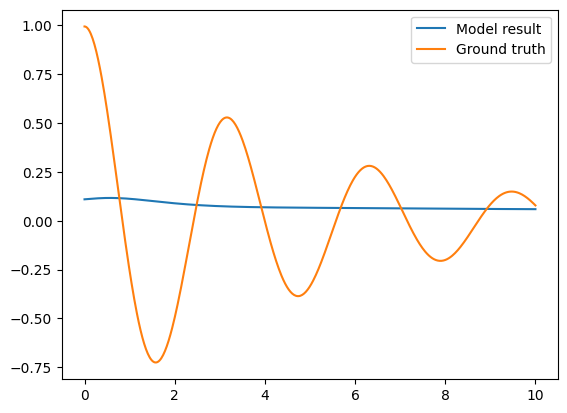

In [18]:
t_list = np.linspace(0, T_MAX, 500)
utils.plot_model_result(model, t_list, OMEGA_0, GAMMA)

## 2. Training and physical system parameters

In [19]:
training_params = {
    "num_epochs": 20000, # number of epochs
    "batch_size": 100,   # number of samples used to compute physics loss
    "lambda_1": 1,     # weight of the physics loss
    "lambda_2": 10,     # Weight of the boundary loss - x(0)
    "lambda_3": 10,       # Weight of the boundary loss - v(0)
    "t_max": T_MAX       # Maximum time used for physics loss evaluation
}

system_params = {
    "omega_0": OMEGA_0,  # Oscillator angular frequency without damping
    "gamma": GAMMA       # Damping parameter
}

## 3. Train the model and collect the plots.

100%|██████████| 20000/20000 [00:41<00:00, 478.57it/s]


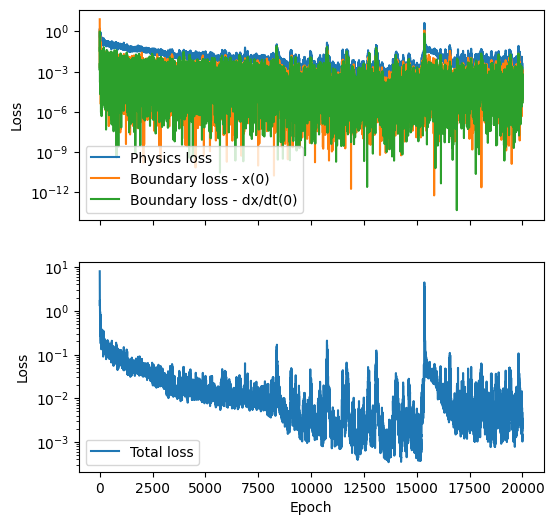

In [20]:
engine.train_model(model, training_params, system_params);

Note: the model with the lowest total loss is the final result.

Plot model result - trained model.

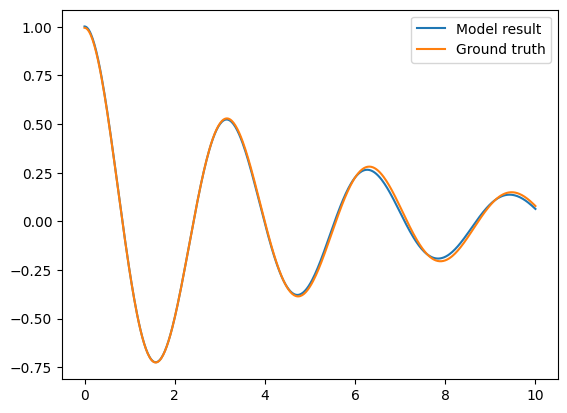

In [24]:
utils.plot_model_result(model, t_list, OMEGA_0, GAMMA)

## 4. Make video of the collected plots.

In [23]:
utils.make_video("plots", "results.mp4", 30)

MoviePy - Building video results.mp4.
MoviePy - Writing video results.mp4



MoviePy - Done !
MoviePy - video ready results.mp4
